
# **Performe - To explore Business Analytics** - Anuradha Patel


Performe - To explore Business Analytics
Problem statement: You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

Importing required libraries¶

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Import the Dataset¶

In [6]:
data = pd.read_csv("/content/Superstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


check wheather there is any null value or not.¶


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Let's check all the columns

In [8]:
data.columns.tolist()

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

Lets find the Descriptive statistics value of datset

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000



Correlation matrix

In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Lets find the pairplot of this datset¶

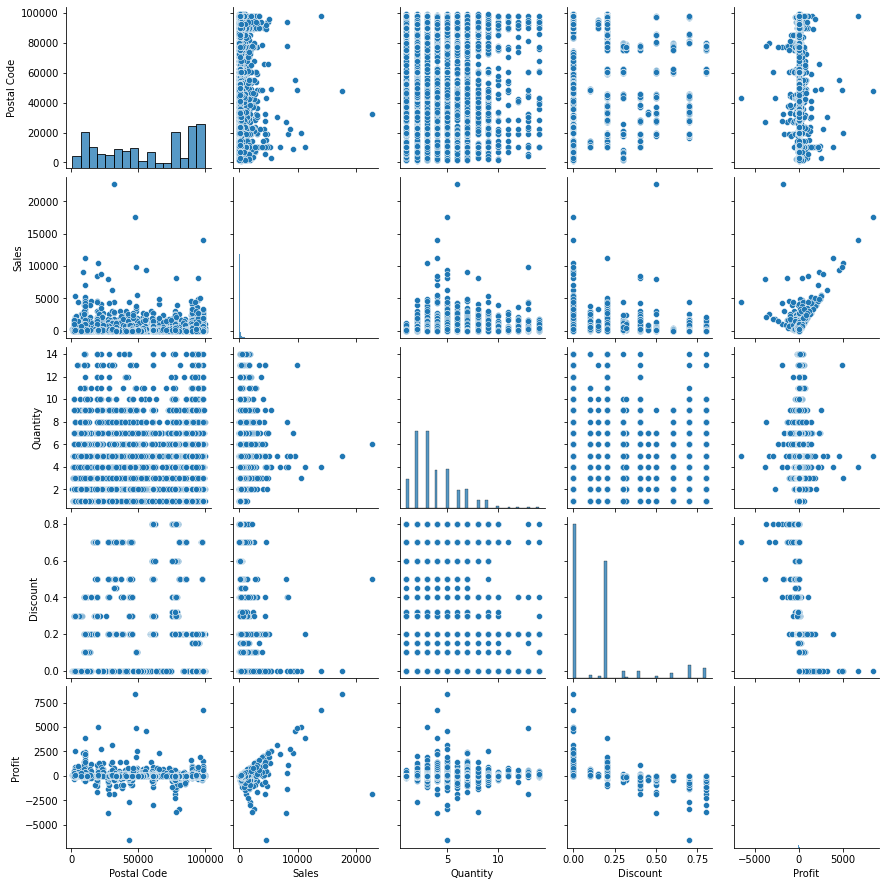

In [11]:
sns.pairplot(data);
plt.show()

Sub-categories classified according to the region.

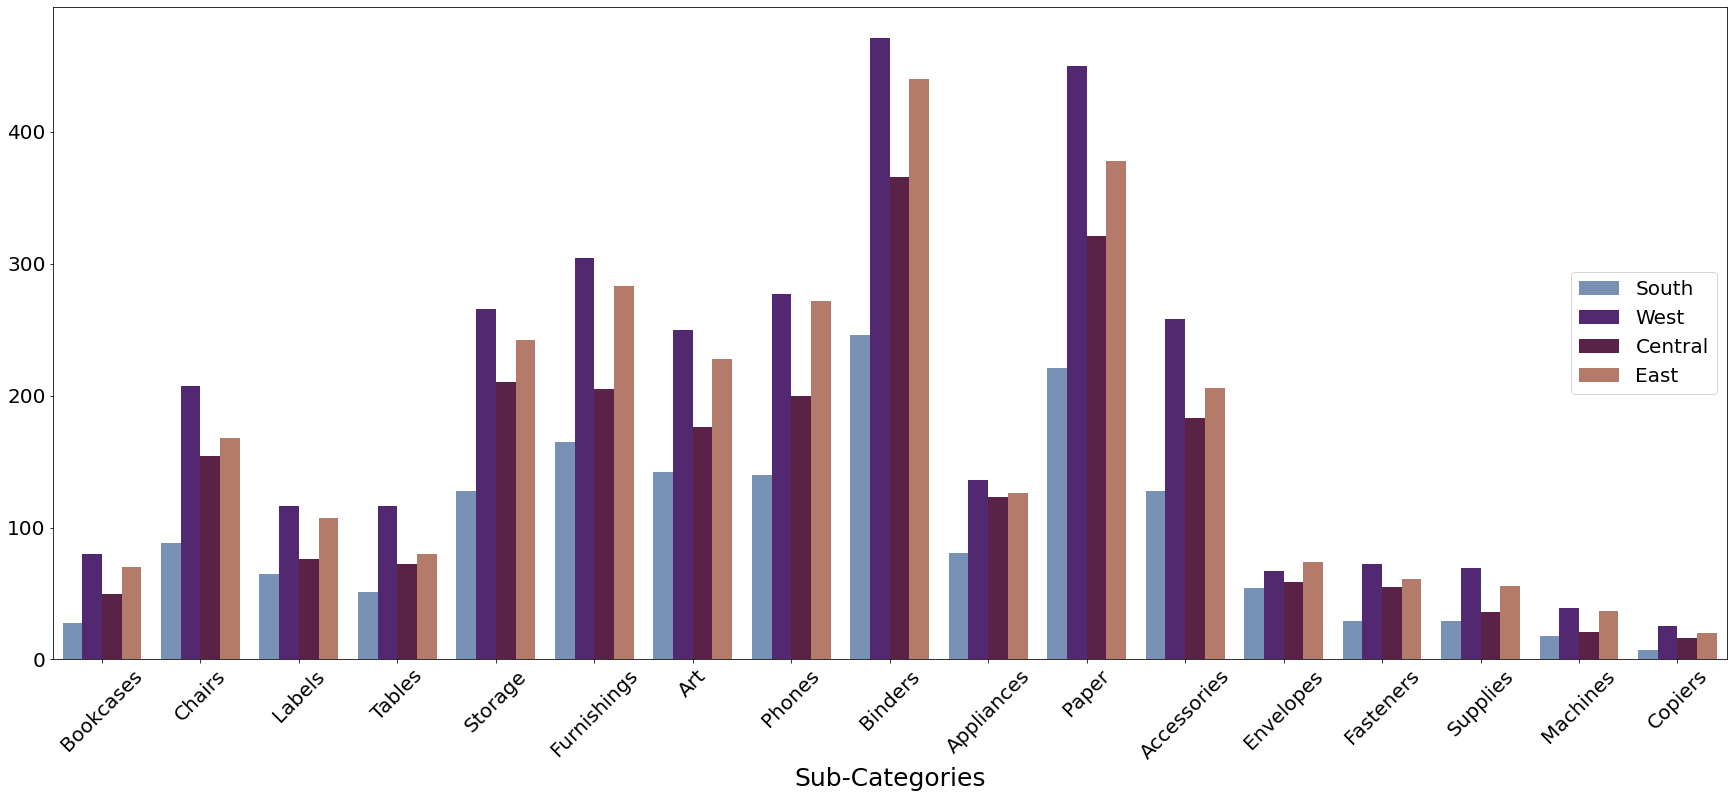

In [12]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = data, palette = 'twilight')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

Categories classified according to the region.

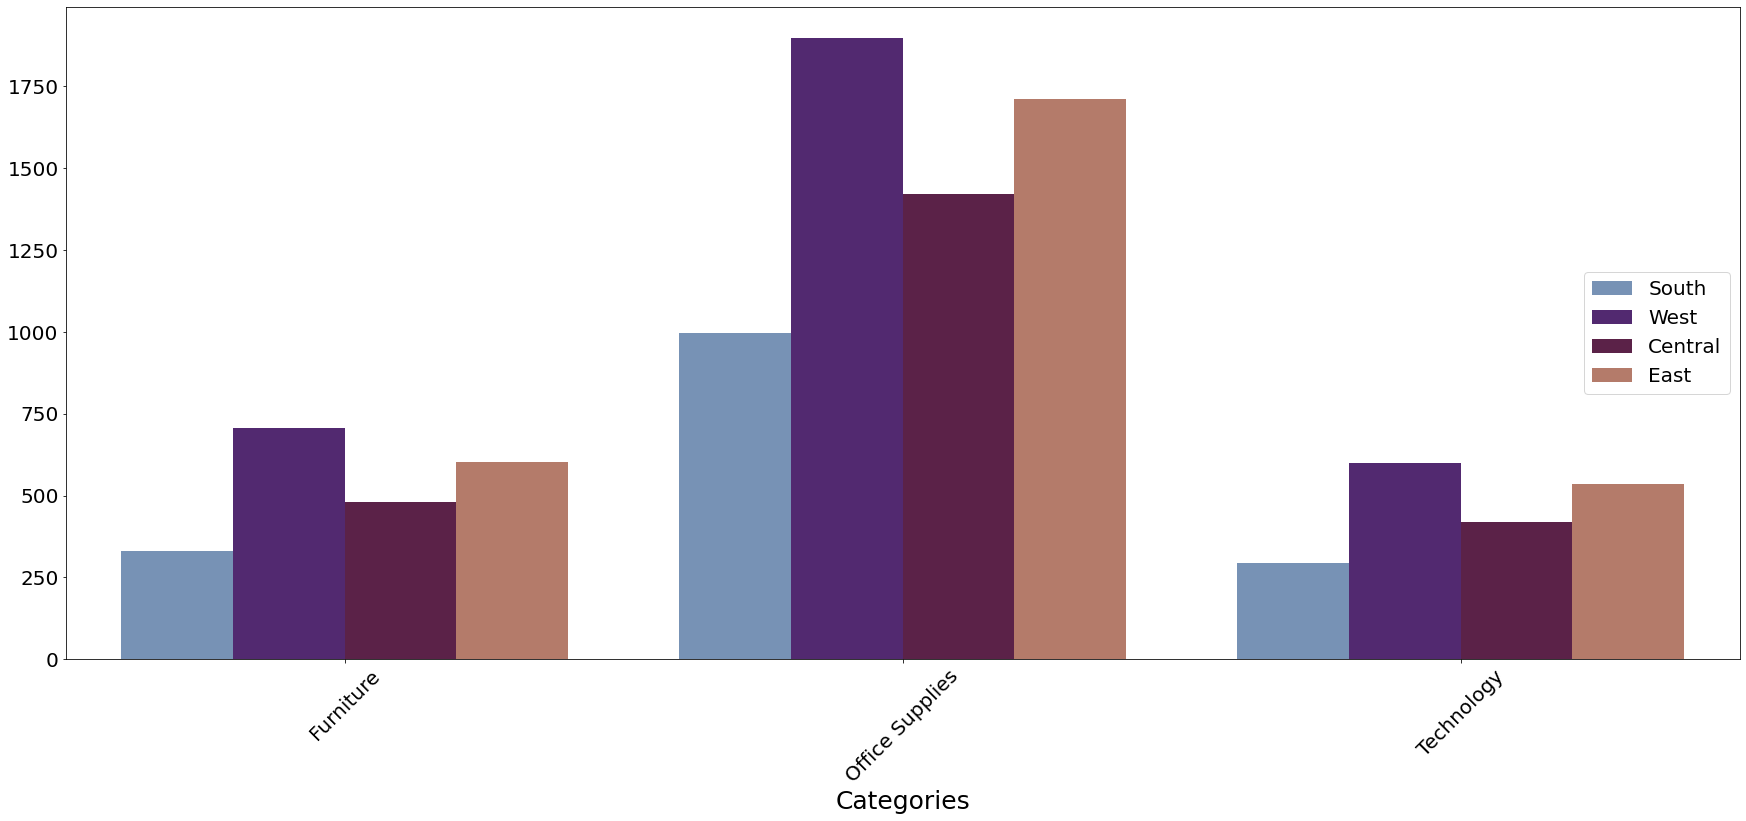

In [13]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Category', hue = 'Region', data = data, palette = 'twilight')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

Quantities ordered vs state

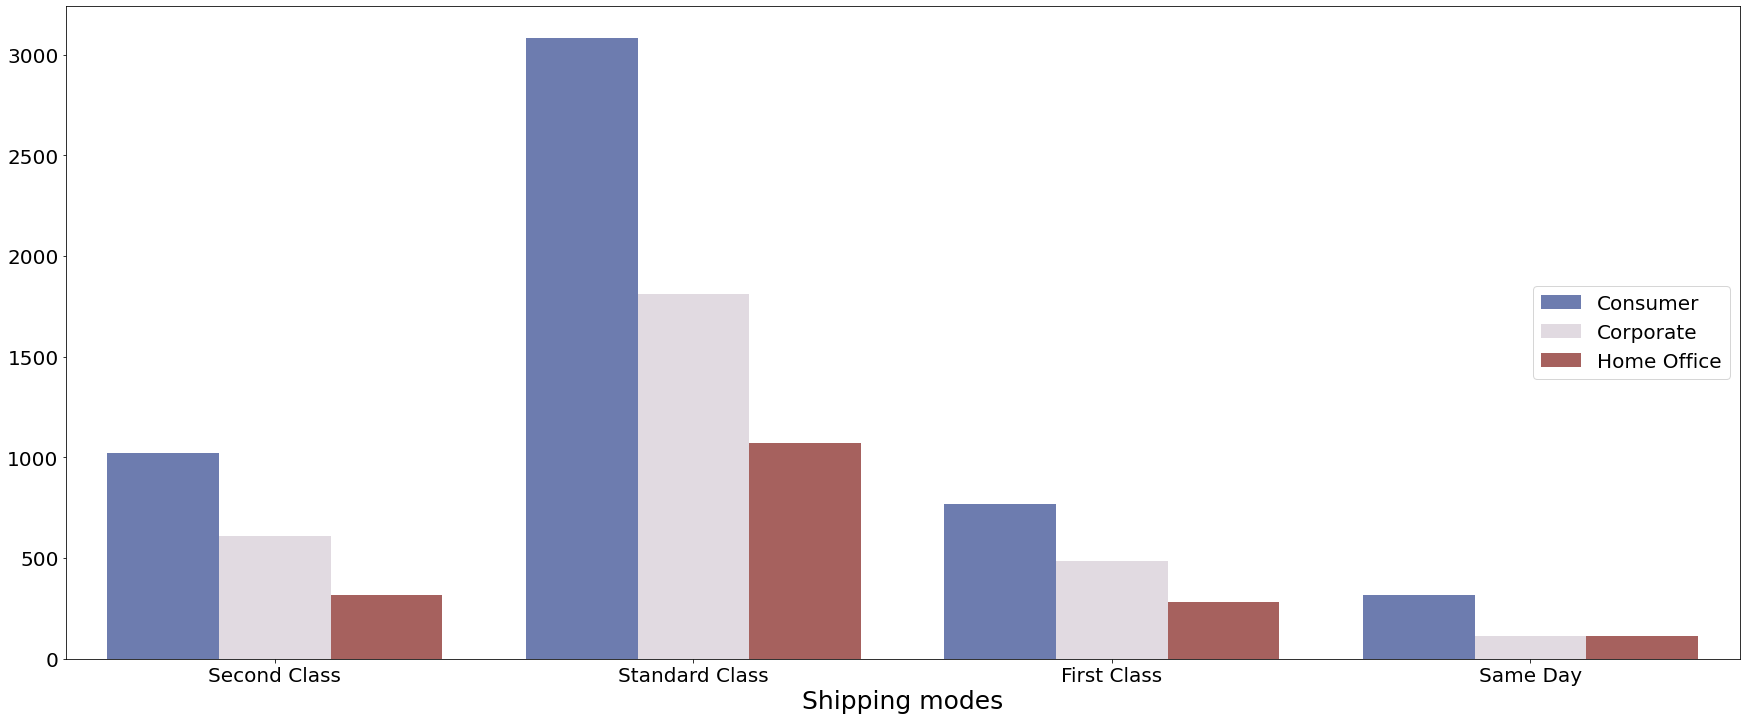

In [14]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = data, palette = 'twilight_shifted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping modes', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

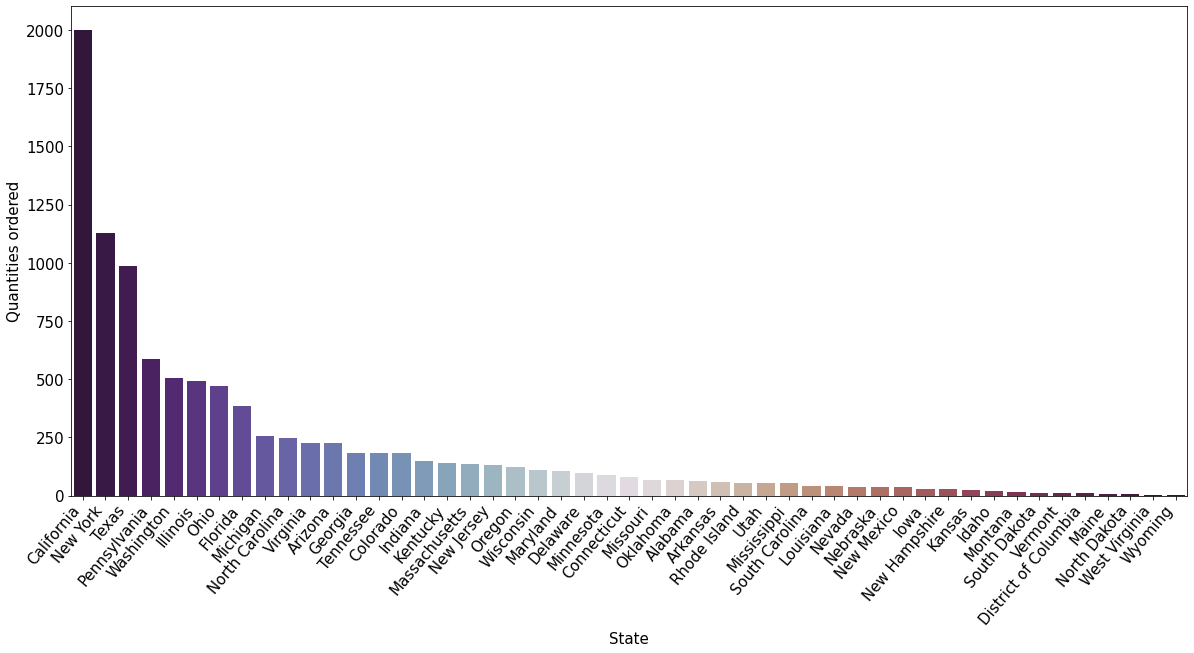

In [15]:
plt.figure(figsize = (20, 9))
sns.countplot(x = data['State'],palette = 'twilight_shifted', order = (data['State'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);


To be more precise, we can get top 10 states for the above graph as shown below.

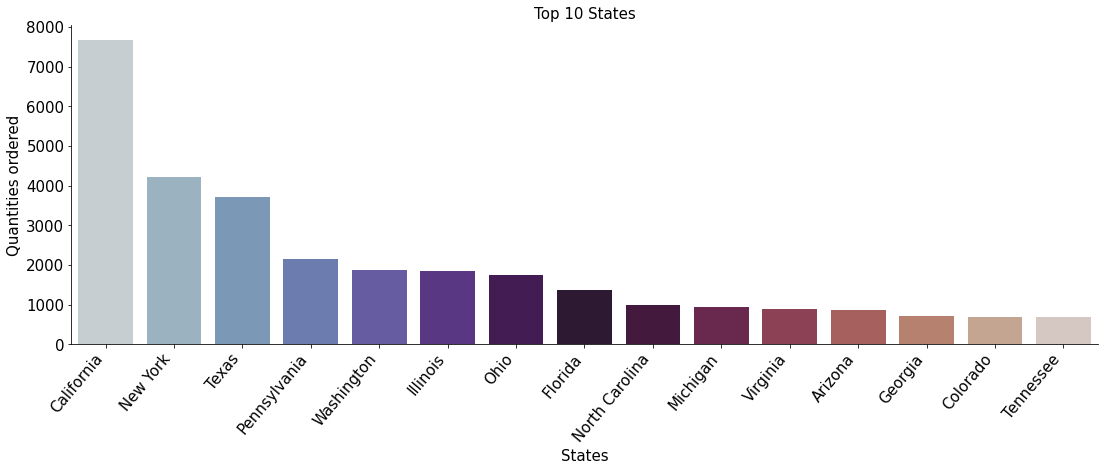

In [16]:
top_10 = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_10.head(15), kind = 'bar', palette = 'twilight', aspect = 3)
plt.title('Top 10 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);


Quantities ordered vs city

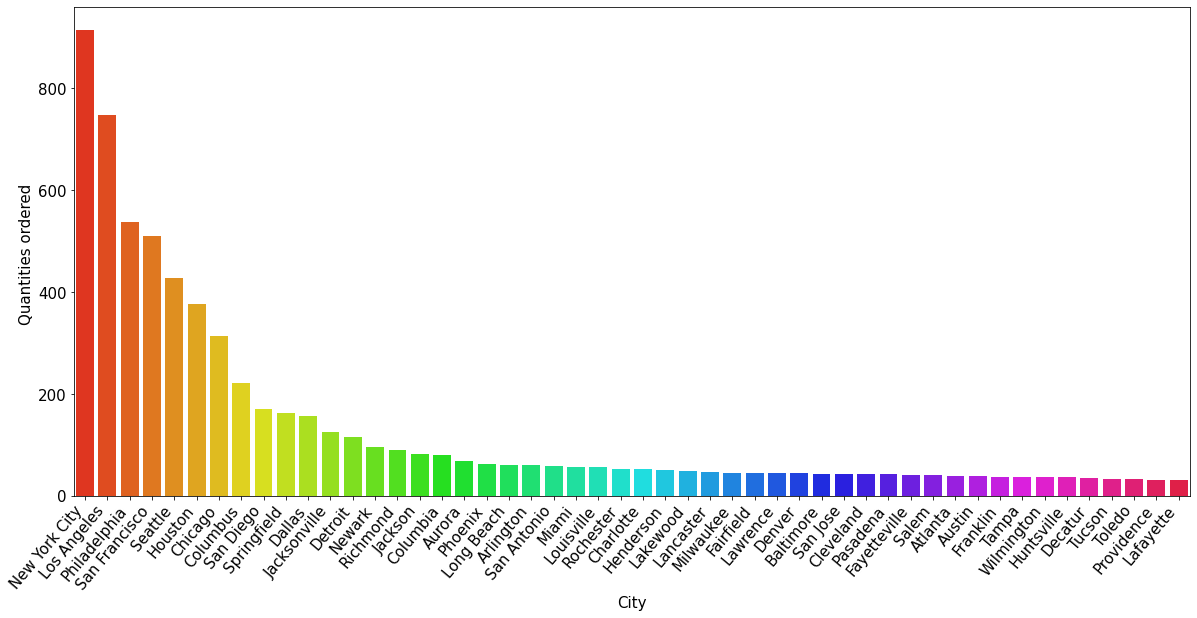

In [17]:
plt.figure(figsize = (20, 9))
sns.countplot(x = data['City'],palette = 'hsv', order = (data['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Quantities ordered ', fontsize = 15);

**To be more precise, we can get top 10 city for the above graph as shown below.**

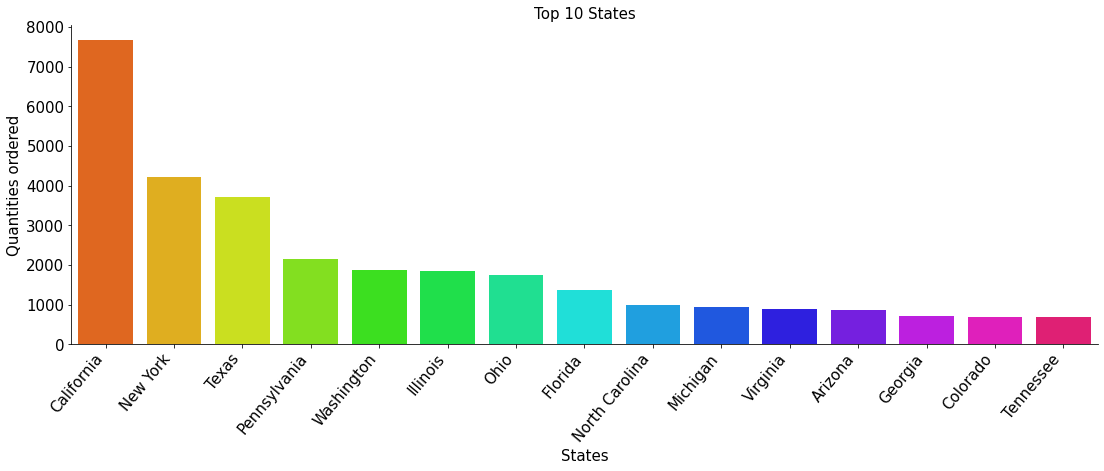

In [18]:
top_10 = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_10.head(15), kind = 'bar', palette = 'hsv', aspect = 3)
plt.title('Top 10 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);

Average profit divided by region


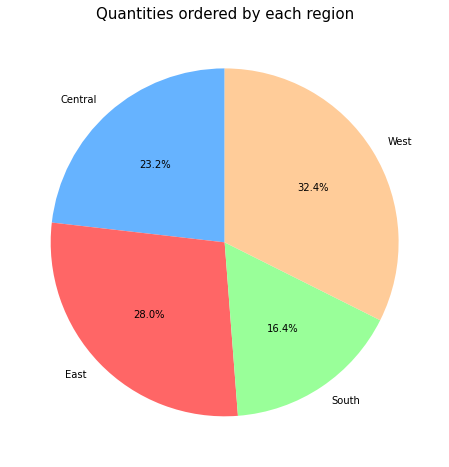

In [19]:
Quantity_vs_region = data.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(Quantity_vs_region['Quantity'], labels = Quantity_vs_region['Region'].unique(), autopct='%1.1f%%', startangle = 90,
       colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'])

plt.title('Quantities ordered by each region', fontsize = 15);

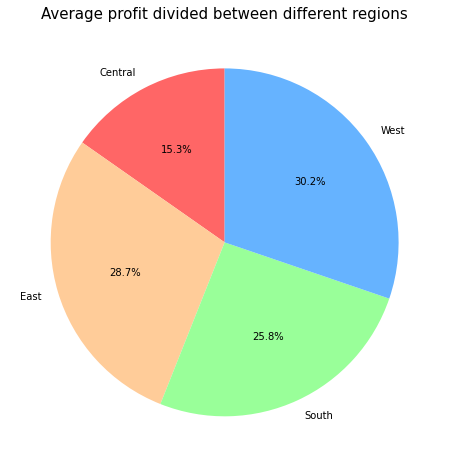

In [20]:
Profit_vs_region = data.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(Profit_vs_region ['Profit'], labels = Profit_vs_region ['Region'].unique(), autopct = '%.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Average profit divided between different regions', fontsize = 15);